In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib as plt
from PIL import Image
import shutil
import glob

2023-06-01 00:36:07.667169: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-01 00:36:08.383089: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-01 00:36:08.453994: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/omer_atique/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-06-01 0

In [2]:
data = []
label = []

dataset_path = "./dataset/flowers"



subfolders = sorted([f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))])

print(subfolders)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [3]:
shutil.rmtree('./resizedImages', ignore_errors=True)
os.mkdir('./resizedImages')

In [4]:
y_label = []

image_size = 224
resized_folder = './resizedImages/'

j = 0
for subfolder in subfolders:
    subfolder_path = os.path.join(dataset_path, subfolder)
    print(subfolder_path)
    i = 0
    for filename in sorted(os.listdir(subfolder_path)):
        if filename.endswith(".png") or filename.endswith(".jpg"):
            image_file = filename
            image_path = os.path.join(subfolder_path, image_file)
            image = Image.open(image_path)
            image = image.resize((image_size, image_size))
                
            new_path = resized_folder + subfolder + "_" + str(i) + ".jpg"
            
            image.save(new_path)

                
            y_label.append(subfolder)
            if i == 200:
                break
            i+=1
            j+=1

./dataset/flowers/daisy
./dataset/flowers/dandelion
./dataset/flowers/rose
./dataset/flowers/sunflower
./dataset/flowers/tulip


In [5]:
file_names = os.listdir('./resizedImages/')

labels = []

daisy_count = 0
dandelion_count = 0
rose_count = 0
sunflower_count = 0
tulip_count = 0

for img_file in file_names:



    if 'daisy' in img_file:
        daisy_count += 1
        labels.append(0)
        
    elif 'dandelion' in img_file:
        dandelion_count += 1
        labels.append(1)
        
    elif 'rose' in img_file:
        rose_count += 1
        labels.append(2)
        
    elif 'sunflower' in img_file:
        sunflower_count += 1
        labels.append(3)
        
    else:
        tulip_count += 1
        labels.append(4)
        
print('Number of daisy images =', daisy_count)
print('Number of dandelion images =', dandelion_count)
print('Number of Rose images = ', rose_count)
print('Number of Sunflower images = ', sunflower_count)
print('Number of tulip images = ', tulip_count)


Number of daisy images = 201
Number of dandelion images = 201
Number of Rose images =  201
Number of Sunflower images =  201
Number of tulip images =  201


In [6]:
image_directory = './resizedImages/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]
flower_images = np.asarray([cv2.imread(file) for file in files])

In [7]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1 2 3 4]
[201 201 201 201 201]


In [8]:
X = flower_images
Y = np.asarray(labels)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.2,
                                                    random_state=2)

In [10]:
print(X.shape, X_train.shape, X_test.shape)

(1005, 224, 224, 3) (804, 224, 224, 3) (201, 224, 224, 3)


In [11]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [12]:
import tensorflow_hub as hub

mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

2023-06-01 00:36:47.076896: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-01 00:36:47.077405: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/omer_atique/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-06-01 00:36:47.077537: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/omer_atique/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-06-01 00:36:47.077633: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Co

In [13]:
num_of_classes = 5

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [14]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [24]:
model.fit(X_train_scaled, Y_train, epochs=10)

Epoch 1/10
26/26 [==============================] - 14s 547ms/step - loss: 0.2799 - acc: 0.9254
Epoch 2/10
26/26 [==============================] - 14s 548ms/step - loss: 0.2504 - acc: 0.9328
Epoch 3/10
26/26 [==============================] - 14s 545ms/step - loss: 0.2203 - acc: 0.9465
Epoch 4/10
26/26 [==============================] - 14s 543ms/step - loss: 0.1981 - acc: 0.9540
Epoch 5/10
26/26 [==============================] - 14s 539ms/step - loss: 0.1718 - acc: 0.9677
Epoch 6/10
26/26 [==============================] - 14s 542ms/step - loss: 0.1585 - acc: 0.9701
Epoch 7/10
26/26 [==============================] - 14s 542ms/step - loss: 0.1376 - acc: 0.9764
Epoch 8/10
26/26 [==============================] - 14s 536ms/step - loss: 0.1345 - acc: 0.9801
Epoch 9/10
26/26 [==============================] - 14s 544ms/step - loss: 0.1172 - acc: 0.9913
Epoch 10/10
26/26 [==============================] - 14s 540ms/step - loss: 0.1066 - acc: 0.9900


In [25]:
score, acc = model.evaluate(X_test_scaled, Y_test)
#print('Test Loss =', score)
print('Test Accuracy =', acc*100)

7/7 [==============================] - 4s 520ms/step - loss: 0.4444 - acc: 0.8358
Test Accuracy = 83.58209133148193


In [26]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

def classifyImage(path):
    
    input_image = cv2.imread(path)
    plt.imshow(input_image)
    plt.show()

    input_image_resize = cv2.resize(input_image, (224,224))

    input_image_scaled = input_image_resize/255

    image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

    input_prediction = model.predict(image_reshaped)

    print(input_prediction)

    input_pred_label = np.argmax(input_prediction)

    print(f"Label Predicted: {input_pred_label}")

    if input_pred_label == 0:
        print('The image represents a daisy')

    elif input_pred_label == 1:
        print('The image represents a dandelion')
    elif input_pred_label == 2:
        print('The image represents a rose')
    elif input_pred_label == 3:
        print('The image represents a sunflower')
    else:
        print('The image represents a tulip')
    

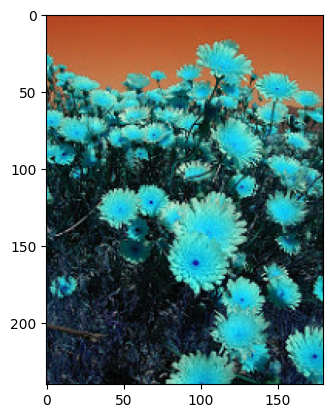

1/1 [==============================] - 0s 67ms/step
[[ 1.1436734   0.22485514 -3.4012825   1.2931659  -4.4988217 ]]
Label Predicted: 3
The image represents a sunflower


In [27]:
classifyImage("./pred/test.jpg")

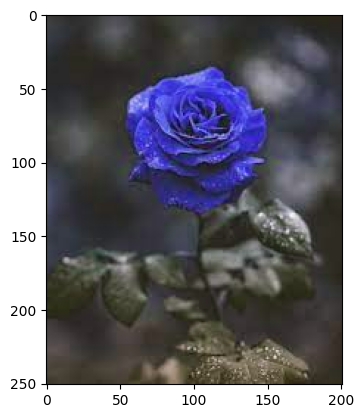

1/1 [==============================] - 0s 82ms/step
[[-2.8953383 -1.2099208  3.080913  -2.412575  -4.41954  ]]
Label Predicted: 2
The image represents a rose


In [28]:
classifyImage("./pred/test1.jpg")